In [58]:
import warnings
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("..")
warnings.filterwarnings('ignore')
from Scripts.Data_cleaning import load_data,clean_data
from Scripts.data_visualization import Data_visualiz

###### Load datasets

In [2]:
train = load_data('../data/train-data.csv')
test = load_data('../data/test-data.csv')

In [3]:
train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Days,months,Years,DayOfYear,WeekOfYear
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,555.0,1,1,0,1,31,7,2015,212,31
1,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,546.0,1,1,0,1,30,7,2015,211,31
2,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,523.0,1,1,0,1,29,7,2015,210,31
3,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,560.0,1,1,0,1,28,7,2015,209,31
4,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,612.0,1,1,0,1,27,7,2015,208,31


In [4]:
train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Days', 'months', 'Years', 'DayOfYear', 'WeekOfYear'],
      dtype='object')

In [5]:
test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Open,Promo,StateHoliday,SchoolHoliday,Days,months,Years,DayOfYear,WeekOfYear
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-17,1.0,1.0,0,0.0,17.0,9.0,2015.0,260.0,38.0
1,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-16,1.0,1.0,0,0.0,16.0,9.0,2015.0,259.0,38.0
2,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-15,1.0,1.0,0,0.0,15.0,9.0,2015.0,258.0,38.0
3,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-14,1.0,1.0,0,0.0,14.0,9.0,2015.0,257.0,38.0
4,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-13,0.0,0.0,0,0.0,13.0,9.0,2015.0,256.0,37.0


In [6]:
clean_data(train).convert_to_datetime(train,['Date'])
clean_data(test).convert_to_datetime(test,['Date'])


In [7]:
D = Data_visualiz()

##### Graphical analysis

###### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

###### distribution for train 

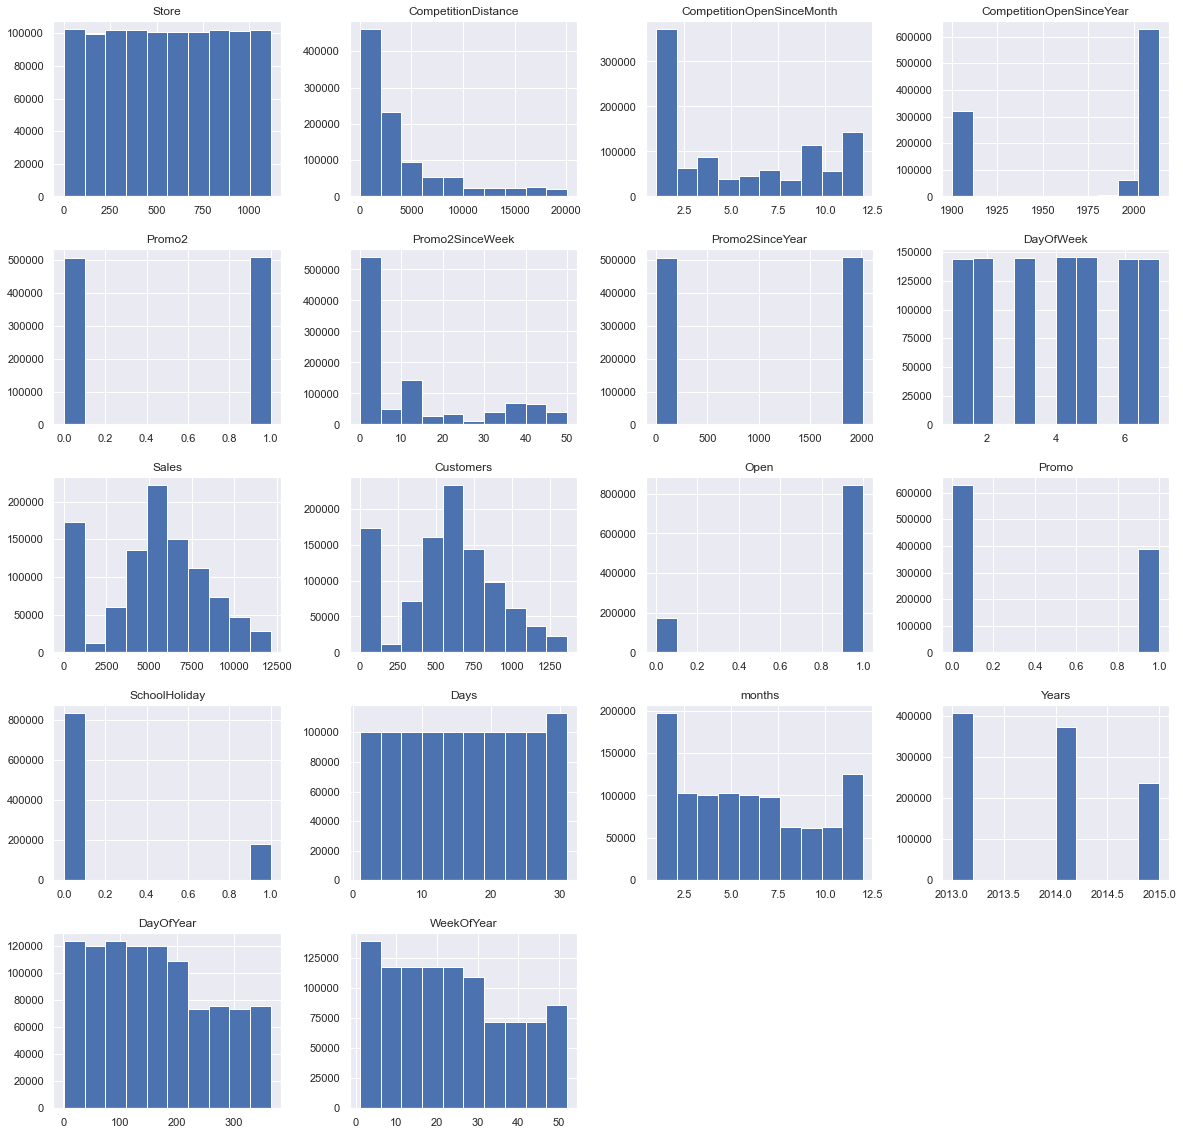

In [8]:
D.histogram(train)

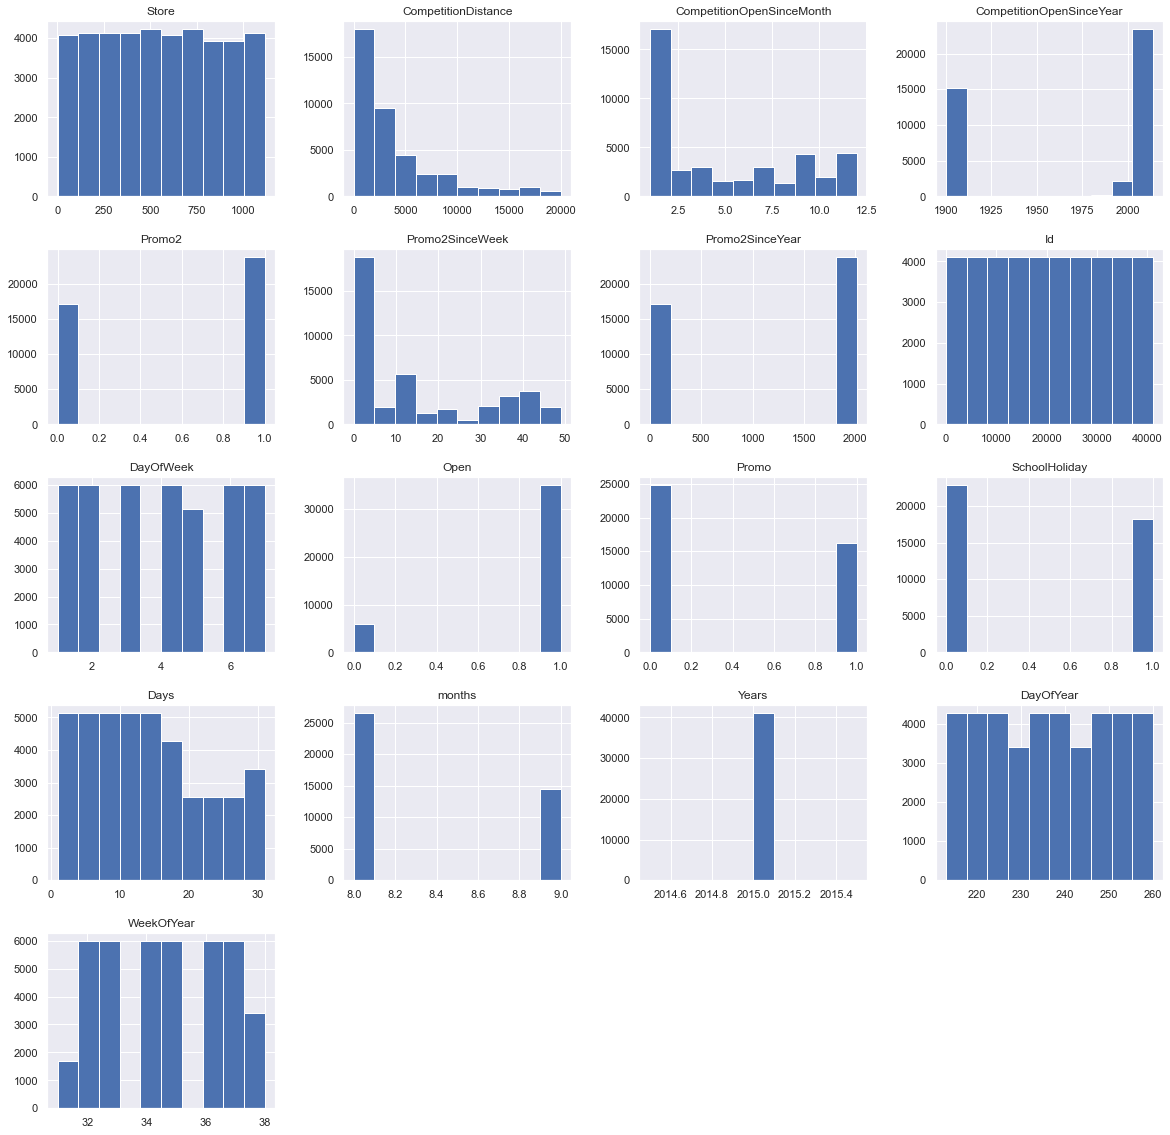

In [9]:
D.histogram(test)

###### Timeseries  

###### Find out any seasonal (Christmas, Easter etc) purchase behaviours,


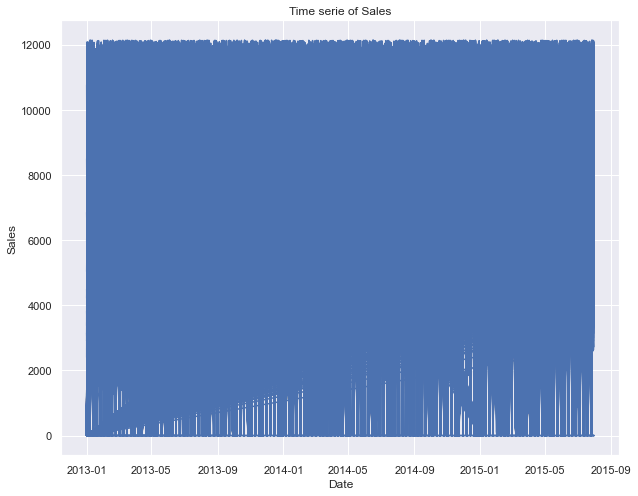

In [10]:
D.plot(train,'Date','Sales')

Due a huge number of data point in our train data, we are going to resample by month so that we can interprete it appropriately 

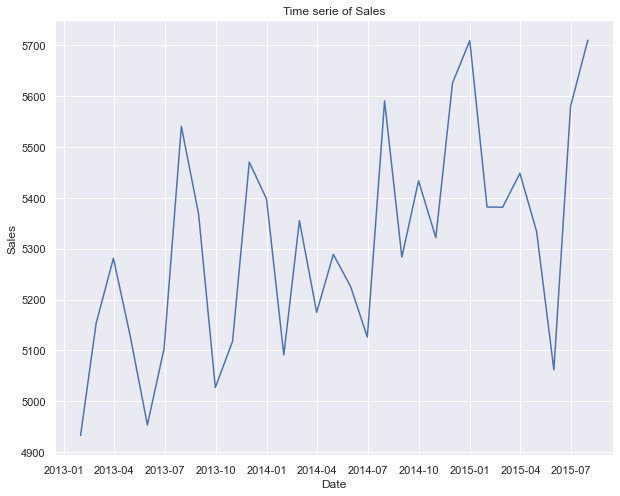

In [11]:
# resampling the dataset by month 
df_ = train.set_index('Date')
df_ = df_.resample('M').mean().reset_index()
D.plot(df_,'Date','Sales');

###### Scatter plot

###### What can you say about the correlation between sales and number of customers?

analysing the relationship between number of customers and sales 

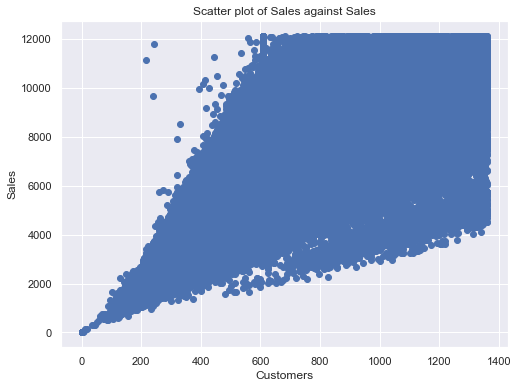

In [12]:
D.plot_counts(train,'Customers','Sales',Type = 'bivariate_scatter')

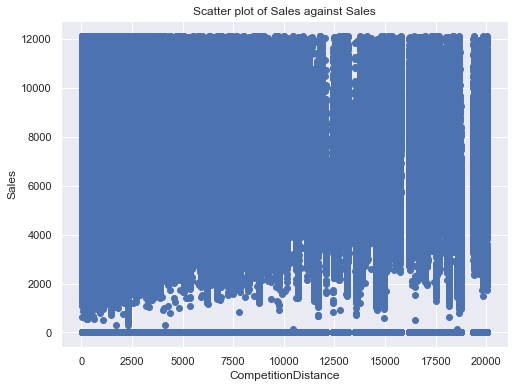

In [13]:
D.plot_counts(train,'CompetitionDistance','Sales',Type = 'bivariate_scatter')

There is a positive trend between customers and sales 

In [14]:
train['Promo'].unique()

array([1, 0], dtype=int64)

##### non-graphical analysis

Analysing the sales behavoir in holidays and non holidays

###### Check & compare sales behavior before, during and after holidays

In [15]:
#non holidays
df_holiday = train[train['StateHoliday'] != '0']
df_holiday.describe()['Sales']

count    30966.000000
mean       181.542046
std       1133.434358
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12129.000000
Name: Sales, dtype: float64

In [16]:
#holidays 
df_non_holidays = train[train['StateHoliday'] == '0']
df_non_holidays.describe()['Sales']

count    983601.000000
mean       5464.998580
std        3015.494267
min           0.000000
25%        3971.000000
50%        5744.000000
75%        7425.000000
max       12137.000000
Name: Sales, dtype: float64

###### Analysing the effect of promo on the customers 

##### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


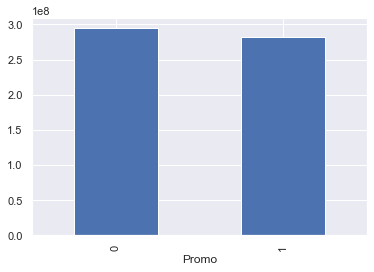

In [17]:
train.groupby('Promo').sum()['Customers'].plot(kind='bar');

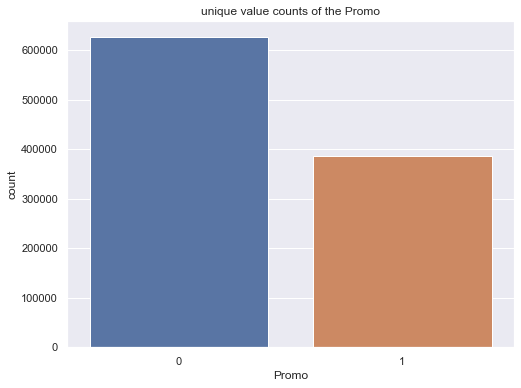

In [18]:
D.plot_counts(train,'Promo',Type = 'univariate')

it can be seen that, the promotion affects sales, since we have few number of counts of promotion(1) comparing to non promotion day(0) but sales seems to be equal 

###### analysing effect of assortment on sales  

###### Check how the assortment type affects sales 

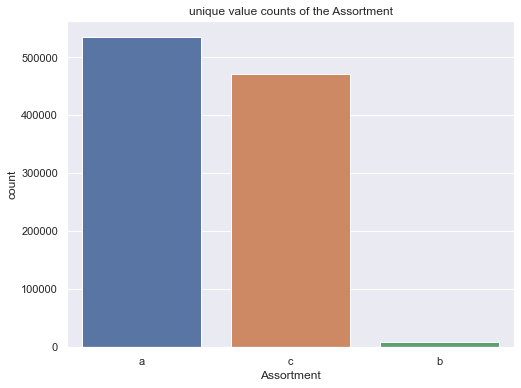

In [19]:
D.plot_counts(train,'Assortment',Type = 'univariate')

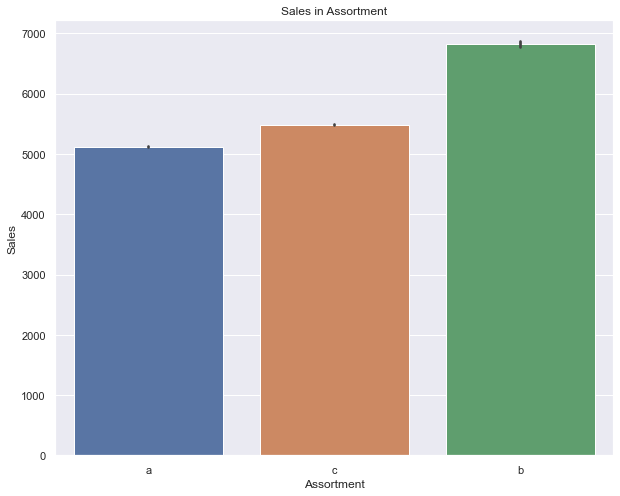

In [23]:
D.plot_counts(train,'Assortment','Sales',Type='bar')

As shown on the above two graphs that the Assortment B(extra) has high sales though it counts low comparing to others 

##### analysing stores

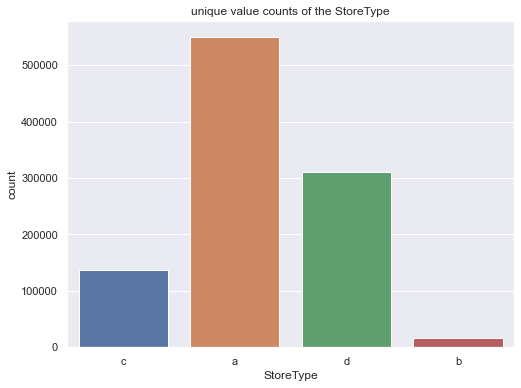

In [20]:
D.plot_counts(train,'StoreType',Type = 'univariate')

##### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [60]:
train['Days of the week'] = train['Date'].dt.dayofweek
mask = train[(train['Days of the week'].isin([0,1,2,3,4])) & train['Open']==1]
mask[mask['StoreType'] == 'a']['Days of the week'].unique()

array([4, 3, 2, 1, 0, 6, 5], dtype=int64)

store a is opened all weekdays

In [48]:
mask[mask['StoreType'] == 'b']['Days of the week'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

store b is also opened all weekdays

In [54]:
mask[mask['StoreType'] == 'c']['Days of the week'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [55]:
mask[mask['StoreType'] == 'd']['Days of the week'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

it seems all stocks open in all weekdays 

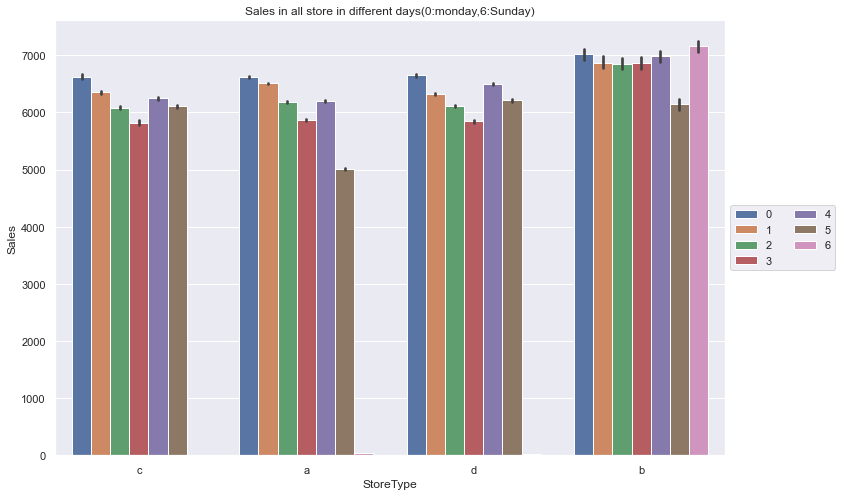

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x=train['StoreType'],y=train['Sales'],hue=train['Days of the week'])
plt.title('Sales in all store in different days(0:monday,6:Sunday)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2);

Most of the stock, their sales significantly decrease on sunday 

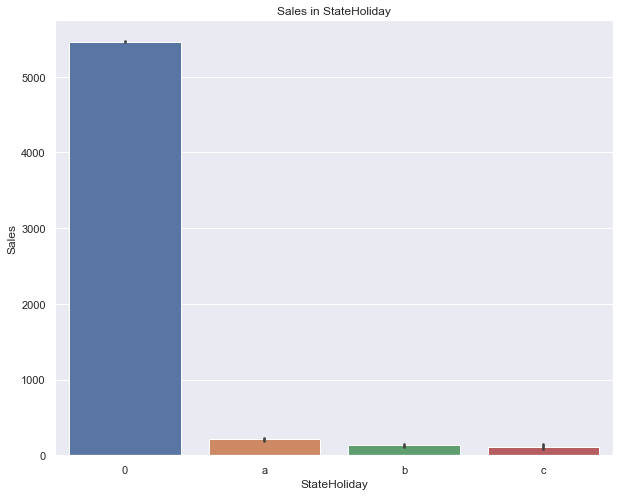

In [22]:
D.plot_counts(train,'StateHoliday','Sales',Type='bar')